In [2]:
import numpy
import os
import save_load_file as slf # https://github.com/ricardodeazambuja/Python-UTILS

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 

In [3]:
sim_set = "experiment_0001" # basically is the name of the folder where the data is read/saved
base_dir = "simulation_data_00003"

In [4]:
joint_positions=numpy.load(base_dir+"/"+sim_set+"/XY_movement_square.npy")

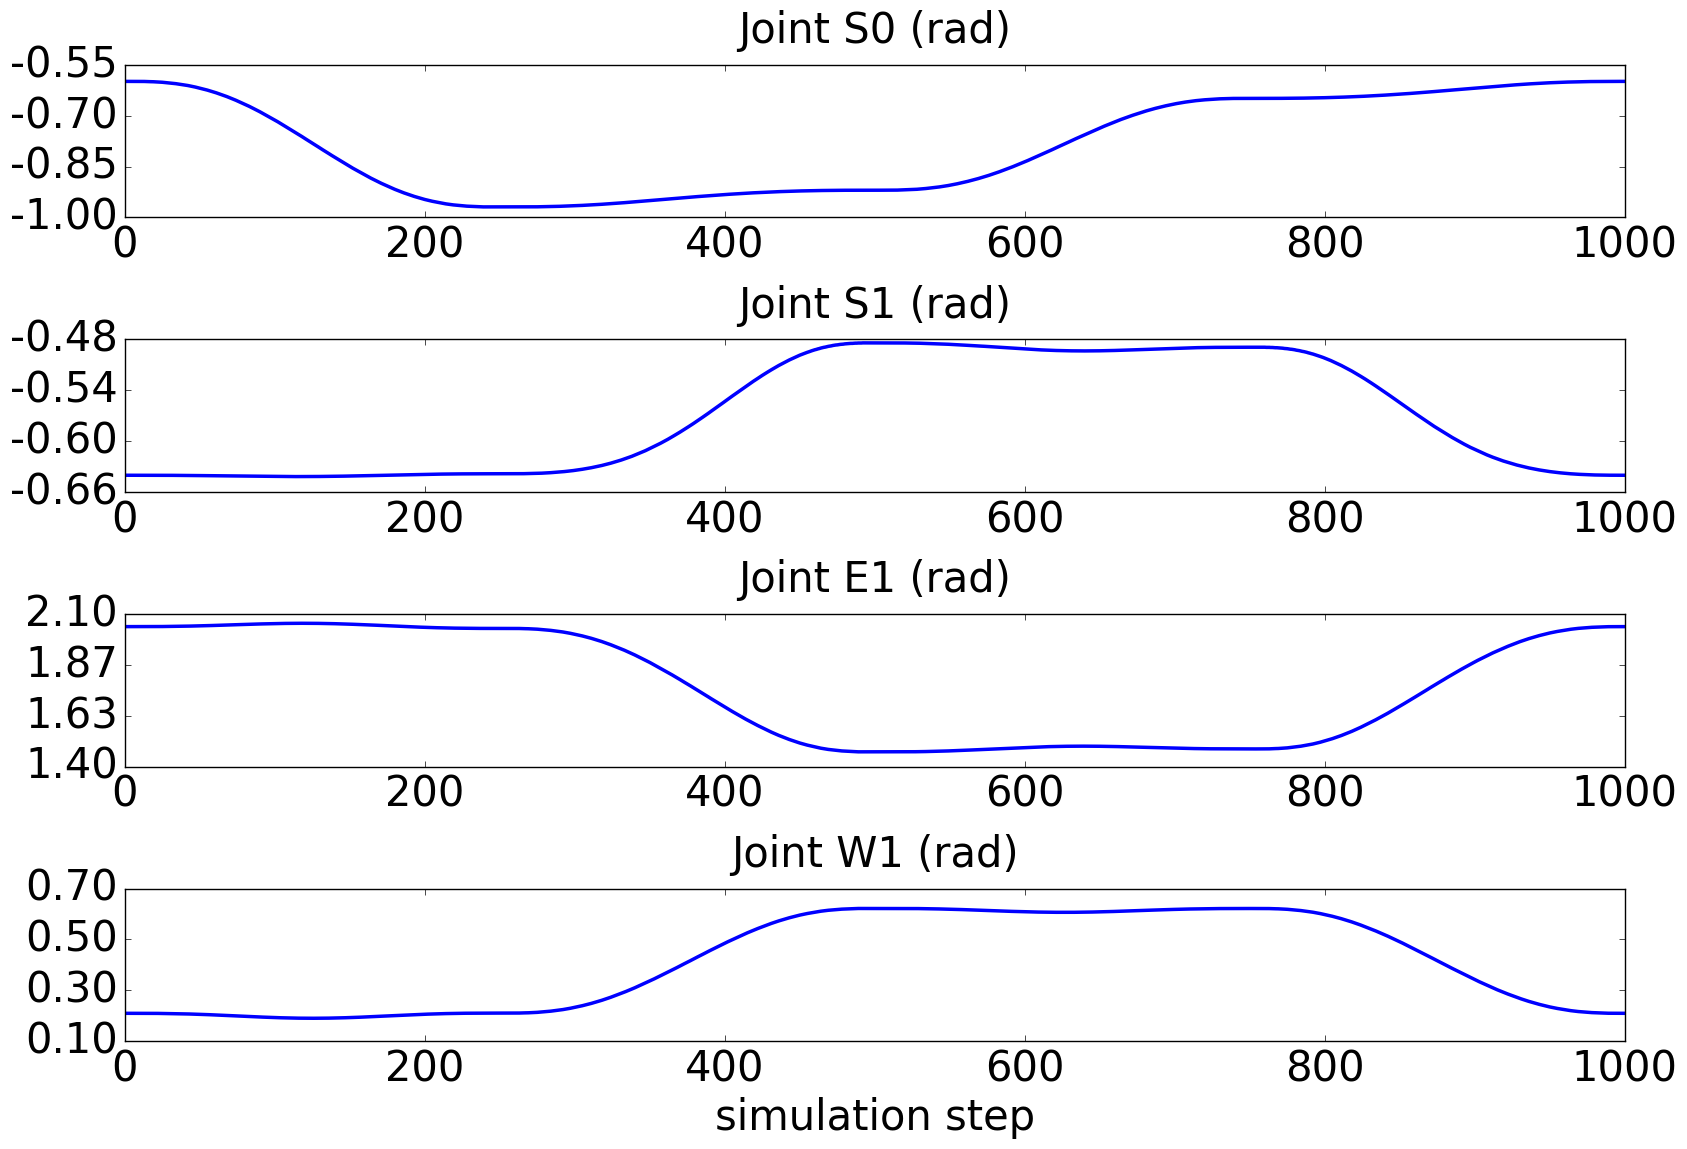

In [6]:
# 
# Defines which shape is going to be used to generate the figures
#

import matplotlib.ticker as ticker

joint_positions=numpy.load(base_dir+"/"+sim_set+"/XY_movement_square.npy")


font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

#
# Plots the original curves
#
fig=plt.figure(figsize =(15,20))

# plt.subplot(7,1,1)
# plt.plot(XY_movement[shape_i][:,0],XY_movement[shape_i][:,1])
# plt.title("X and Y")
ax = []

ax.append(plt.subplot(7,1,4))
ax[-1].plot(joint_positions[:,0],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint S0 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.append(plt.subplot(7,1,5))
ax[-1].plot(joint_positions[:,1],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint S1 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.append(plt.subplot(7,1,6))
ax[-1].plot(joint_positions[:,2],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint E1 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.append(plt.subplot(7,1,7))
ax[-1].plot(joint_positions[:,3],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint W1 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax[-1].set_xlabel("simulation step", labelpad=5, fontdict={'fontsize':30})

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.8)
# plt.savefig(os.getcwd()+"/"+"example_joints.pdf", bbox_inches='tight',pad_inches=.1)
plt.show()

In [7]:
square=slf.load_from_file(base_dir+"/"+sim_set+"/"+"square.pickle")

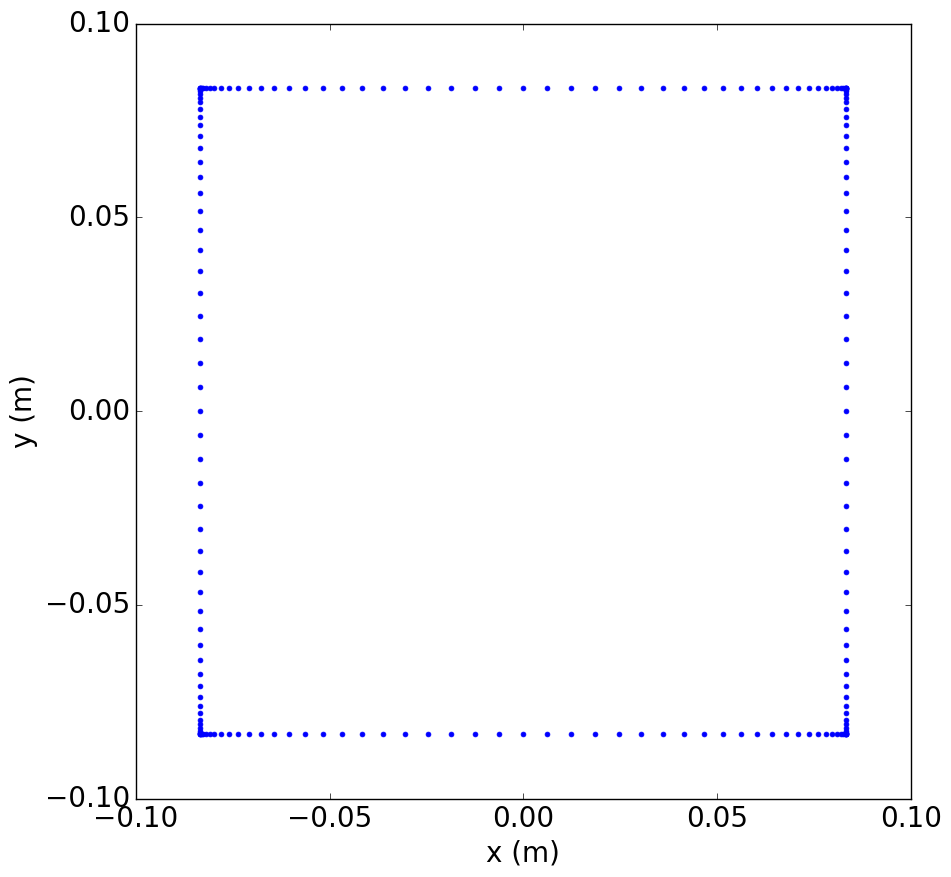

In [8]:
font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))

plt.plot(square[::5,0],square[::5,1],'.',markersize=7)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
# plt.savefig(os.getcwd()+"/"+"initial_shapes.pdf", bbox_inches='tight',pad_inches=.1)
plt.show()

# BAXTER

![title](Baxter_Link_Lengths.png)

In [27]:
def rot_baxter(theta, alpha):
    cos = numpy.cos
    sin = numpy.sin
    l1 = numpy.array([cos(theta), -sin(theta)*cos(alpha),  sin(theta)*sin(alpha)])
    l2 = numpy.array([sin(theta),  cos(theta)*cos(alpha), -cos(theta)*sin(alpha)])
    l3 = numpy.array([         0,             sin(alpha),             cos(alpha)])
    
    return numpy.vstack([l1,l2,l3])

In [28]:
def baxter_arm(s0=0,s1=0,e0=0,e1=0,w0=0,w1=0,w2=0,gripper=[0,0,147.012]):
    '''
    Returns the endpoint cartesian position
    '''
    # Corrections to match the real BAXTER
    s0=s0+numpy.pi/4
    s1=-s1
    e1=-e1+numpy.pi/2
    w1=-w1
    return  numpy.array([0,0,270.35])+rot_baxter(numpy.pi/2+s0, numpy.pi/2).dot(numpy.array([69,0,0])+\
                                      rot_baxter(numpy.pi/2+s1, numpy.pi/2).dot(numpy.array([0,0,364.35])+\
                                      rot_baxter(0+e0, -numpy.pi/2).dot(numpy.array([-69,0,0])+\
                                      rot_baxter(-numpy.pi/2+e1, numpy.pi/2).dot(numpy.array([0,0,374.29])+\
                                      rot_baxter(0+w0, -numpy.pi/2).dot(numpy.array([-10,0,0])+\
                                      rot_baxter(0+w1, numpy.pi/2).dot(numpy.array([0,0,229.525+gripper[2]])+\
                                      rot_baxter(0+w2, 0).dot(numpy.array([gripper[0],gripper[1],0]))))))))

In [29]:
new_square = []
for s0i,s1i,e1i,w1i in joint_positions:
    new_square.append(baxter_arm(s0=s0i,s1=s1i,e0=0,e1=e1i,w0=0,w1=w1i,w2=0)+numpy.array([-0.2591,-0.1362,1.054])*1E3)

new_square = numpy.array(new_square)

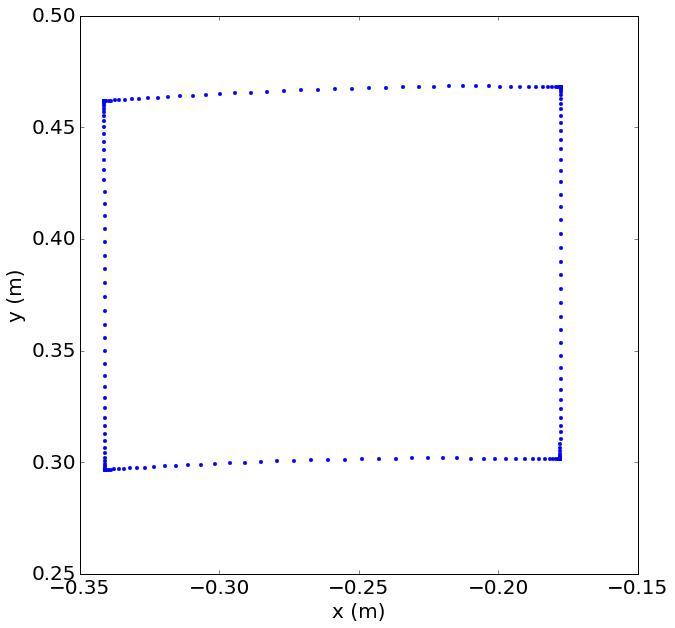

In [30]:
font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))

plt.plot(new_square[::5,0]/1000,new_square[::5,1]/1000,'.',markersize=7)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
# plt.savefig(os.getcwd()+"/"+"initial_shapes.pdf", bbox_inches='tight',pad_inches=.1)
plt.show()

# VREP

In [31]:
import vrep
import numpy
import time
import sys
import os
import subprocess
import save_load_file as slf
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
# Location of the V-REP simulator main file:
vrep_location = "/Applications/V-REP_PRO_EDU_V3_2_2_Mac/vrep.app/Contents/MacOS/vrep"

In [33]:
def simulate_in_baxter(joint_angles):

    background_sim = True #Controls if subprocess is going to be used or an already running simulation.


    if background_sim:
        time_delays = 0.025
    else:
        time_delays = 0.075

    # To automate the process is necessary to avoid the firewall message by deactivating it!!!!
    if background_sim:
        p = subprocess.Popen([vrep_location, '-h', '-s', '-q', \
                              os.getcwd()+'/VREP_scenes/Baxter_IK_felt_pen_pick-and-place_testing_PARALLEL_IROS2016.ttt'])
        # The scene can be found here: https://github.com/ricardodeazambuja/IJCNN2016
        
    time.sleep(1.0)


    xyz_pos = []

    # Object names
    s0_name = 'Baxter_leftArm_joint1'
    s1_name = 'Baxter_leftArm_joint2'
    e1_name = 'Baxter_leftArm_joint4'
    w1_name = 'Baxter_leftArm_joint6'
    XY_reader = 'IK_Z_SLAVE'
    XY_pos = 'IK_XY_MASTER'
    Z_pos = 'IK_Z_MASTER'

    # print 'Program started'
    vrep.simxFinish(-1) # just in case, close all opened connections
    clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5)
    if clientID!=-1:
        # print 'Connected to remote API server'
        res,objs=vrep.simxGetObjects(clientID,vrep.sim_handle_all,vrep.simx_opmode_oneshot_wait) # gets ALL object handles
        if res==vrep.simx_return_ok:
            # print 'Number of objects in the scene: ',len(objs)


            res1,XYr=vrep.simxGetObjectHandle(clientID,XY_reader,vrep.simx_opmode_oneshot_wait) # gets specifically the handle for the XY master

            res2,s0=vrep.simxGetObjectHandle(clientID,s0_name,vrep.simx_opmode_oneshot_wait) # gets specifically the handle for the s0 joint
            res3,s1=vrep.simxGetObjectHandle(clientID,s1_name,vrep.simx_opmode_oneshot_wait) # gets specifically the handle for the s1 joint
            res4,e1=vrep.simxGetObjectHandle(clientID,e1_name,vrep.simx_opmode_oneshot_wait) # gets specifically the handle for the e1 joint
            res5,w1=vrep.simxGetObjectHandle(clientID,w1_name,vrep.simx_opmode_oneshot_wait) # gets specifically the handle for the w1 joint

            if (res1*res2*res3*res4*res5)==vrep.simx_return_ok:
                # print "Ok, I'm in!"

                joint_list = [s0,s1,e1,w1]

                # print "Receiving the joint values"
                
                for ji in joint_angles:
                    #
                    # Receives the joint values from the neural network:
                    #
                    vrep.simxPauseCommunication(clientID,1);
                    vrep.simxSetJointPosition(clientID,joint_list[0],ji[0],vrep.simx_opmode_oneshot);
                    vrep.simxSetJointPosition(clientID,joint_list[1],ji[1],vrep.simx_opmode_oneshot);
                    vrep.simxSetJointPosition(clientID,joint_list[2],ji[2],vrep.simx_opmode_oneshot);
                    vrep.simxSetJointPosition(clientID,joint_list[3],ji[3],vrep.simx_opmode_oneshot);                
                    vrep.simxPauseCommunication(clientID,0);
                    # Above's 3 joints will be received and set on the V-REP side at the same time
                    time.sleep(time_delays)

                    # Reads and saves the current XY positions
                    res,pos = vrep.simxGetObjectPosition(clientID,XYr,-1,vrep.simx_opmode_oneshot_wait)
                    #time.sleep(time_delays)

                    if res!=0:
                        vrep.simxFinish(clientID)
                        print 'Remote API function call returned with error code - 2: ',res
                    else:
                        xyz_pos.append(pos)
            else:
                print 'Remote API function call returned with error code - 1: ',res
        else:
            print 'Remote API function call returned with error code - 0: ',res
    #     returncode=vrep.simxStopSimulation(clientID,vrep.simx_opmode_oneshot_wait)
        vrep.simxFinish(clientID)
    else:
        print 'Failed connecting to remote API server'
    # print 'Program ended'

    # Terminates the process, in the case the connection above failed.
    if background_sim:
        p.terminate()
    time.sleep(0.5)

    # Saves the result of all the trials
    # if save2file:
    #     numpy.save("./"+base_dir+"/"+sim_set+"/xyz_pos_all_trials_"+str(tji)+"_VREP.npy",xyz_pos_all_trials)
    
    return numpy.array(xyz_pos)

In [34]:
vrep_square=simulate_in_baxter(joint_positions)

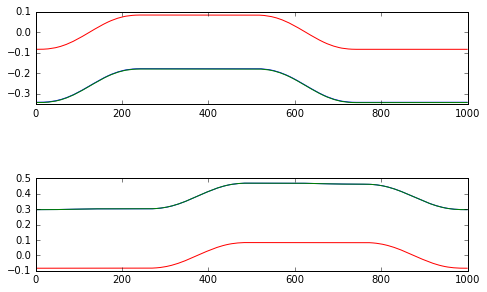

In [35]:
plt.subplot(211)
plt.plot(new_square[:,0]/1000,'b')
plt.plot(square[:,0],'r')
plt.plot(vrep_square[:,0],'g')

plt.subplot(212)
plt.plot(new_square[:,1]/1000,'b')
plt.plot(square[:,1],'r')
plt.plot(vrep_square[:,1],'g')

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.8)
plt.show()

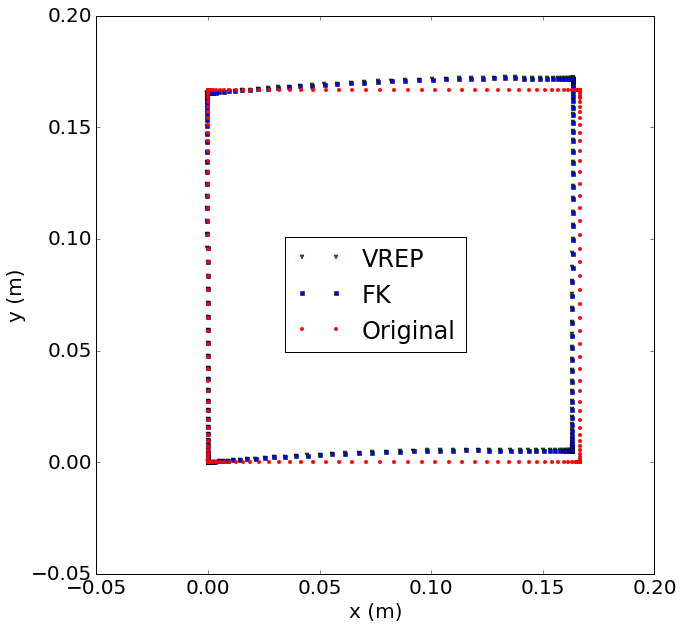

In [37]:
font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))

plt.plot(vrep_square[::5,0]-vrep_square[0,0],vrep_square[::5,1]-vrep_square[0,1],'gv',markersize=4, label='VREP')
plt.plot((new_square[::5,0]-new_square[0,0])/1000,(new_square[::5,1]-new_square[0,1])/1000,'bs',markersize=4, label='FK')
plt.plot((square[::5,0]-square[0,0]),(square[::5,1]-square[0,1]),'r.',markersize=7, label='Original')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# plt.xlim([-0.05,0.3])
# plt.ylim([-0.05,0.3])
plt.legend(loc=0)
# plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
# plt.savefig(os.getcwd()+"/"+"initial_shapes.pdf", bbox_inches='tight',pad_inches=.1)
plt.show()